# Multiple linear regression excercises

$Y_{i} = \beta_{0} + \beta_{1} X_{i} + \beta_{2} X_{i} + \beta_{3} X_{i} + \epsilon_{i}$

- $Y_{i}$: the dependent (random) variable 
- $X_{i}$: independent variable (not random)
- $\beta_{0}, \beta_{1}...$: model parameters 
- $\epsilon_{i}$: Random error, how the observation deviates from the population mean

In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## Task 1
Use LinearRegression from SciPy to predict global signal from 3 rotations and 3 translation parameters. Which motion parameter has highest beta value?

In [2]:
# Load confounds table

confounds_path = "../data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print confounds column names
confounds.columns

Index(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       ...
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2'],
      dtype='object', length=178)

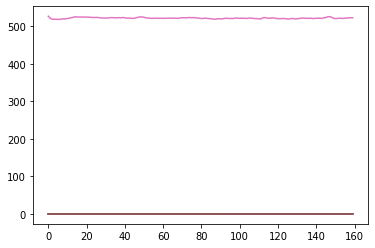

In [3]:
# Filter dataframe to store only 6 motion parameters
motion = confounds[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]

# Filter dataframe to store global signal
global_signal= confounds[["global_signal"]]

# plot all columns values at one plot

plt.plot(motion)

plt.plot(global_signal)


In [4]:
# Fit multiple linear regression model 
nlr = LinearRegression()
nlr.fit(motion,global_signal)

print(nlr.coef_) #to są bety ruchu (pokazują jaki wkład ma dany "ruch")
print(nlr.intercept_) #to jest intercept

[[  -11.12573944    -2.92628293   -12.82090256 -1285.13488422
   -139.39206312   721.33740063]]
[522.10374583]


## Task 2
Use LinearRegression from SciPy to predict harry potter from other book characters. Which character has highest beta value?

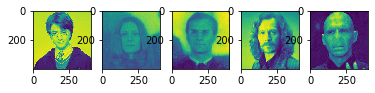

In [5]:
# Load characters

harry = np.load("../data/harry.npy")
lilly = np.load("../data/lilly.npy")
james = np.load("../data/james.npy")
syrius = np.load("../data/syrius.npy")
voldemort = np.load("../data/voldemort.npy")
lista = [harry, lilly, james, syrius, voldemort]
# Plot photos of all character on one plot

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

ax1.imshow(harry)
ax2.imshow(lilly)   
ax3.imshow(james)
ax4.imshow(syrius)
ax5.imshow(voldemort)
plt.show()

In [6]:
# Make matrix of characters (remember to change matrices to vectors and transpose). Use np.vstack.
characters2 = []
for i in lista:
    characters2.append(i.flatten())

characters = np.vstack((characters2))
characters_matrix = characters.T
# Print shape of matrix
print(characters.shape)

print(characters_matrix.shape)

(5, 160000)
(160000, 5)


In [11]:
# Run multiple linear regression
mrl = LinearRegression()
mrl.fit(characters_matrix[:,1:], characters_matrix[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Print regression coefficients
print(mrl.coef_)

[ 0.30350441  0.83204686  0.2543541  -0.08258658]


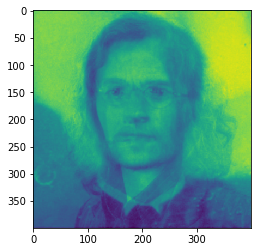

In [13]:
# Print predicted harry
beta = mrl.coef_
intercept = mrl.intercept_
predicted_harry = beta[0] * lilly + beta[1] * james + beta[2] * syrius + beta[3] * voldemort + intercept

plt.imshow(predicted_harry)